### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [66]:
data = pd.read_csv('data/coupons.csv')

In [67]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [69]:
stats = data.describe()
print(stats)

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

In [70]:
data["Y"].value_counts(normalize=True)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64

2. Investigate the dataset for missing or problematic data.

In [71]:
missing_vals = None
missing_vals = data.isna().sum()
print(type(missing_vals))
missing_vals

<class 'pandas.core.series.Series'>


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [72]:
data["car"] = data["car"].fillna("Unknown")
data.isna().sum().sort_values(ascending=False)
data.shape

(12684, 26)

In [73]:
data["coupon_type"] = data["coupon"].map({
    "Restaurant(<20)": "Restaurant<20",
    "Restaurant(20-50)": "Restaurant20-50",
    "Coffee House": "CoffeeHouse",
    "Carry out & Take away": "CarryOut",
    "Bar": "Bar"
})
freq_columns = ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]
for c in freq_columns:
    data[c] = data[c].fillna("Unknown")

In [74]:
core_columns = ["Y", "coupon", "destination", "time"]
data = data.dropna(subset=core_columns)

In [75]:
data.shape

(12684, 27)

4. What proportion of the total observations chose to accept the coupon?



Proportion accepted: 0.5684326710816777
Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64


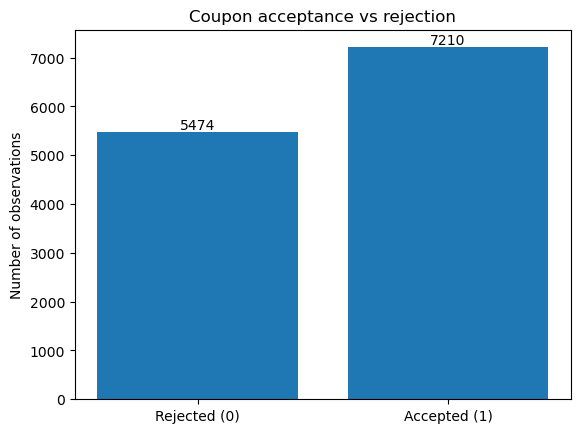

In [76]:
# Proportion accepted (Y = 1)
accept_proportion = data["Y"].mean()
print("Proportion accepted:", accept_proportion)

# Equivalent using value_counts:
accept_rates = data["Y"].value_counts(normalize=True)
print(accept_rates)   # index 1 is accept, 0 is reject

accept_counts = data["Y"].value_counts().sort_index()  # 0 then 1

plt.bar(accept_counts.index.astype(str), accept_counts.values)
# Add labels manually
for i, v in enumerate(accept_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')
    # i is the x position, v + 0.1 is the y position (slightly above the bar)

plt.xticks([0, 1], ["Rejected (0)", "Accepted (1)"])
plt.ylabel("Number of observations")
plt.title("Coupon acceptance vs rejection")
plt.savefig("images/barchartOfAcceptVsReject.png")
plt.show()

5. Use a bar plot to visualize the `coupon` column.

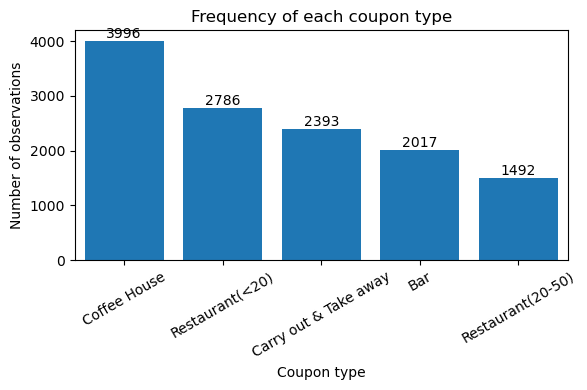

In [84]:
# Count each coupon type
coupon_counts = data["coupon"].value_counts()

# Bar plot
plt.figure(figsize=(6,4))
coupon_counts.plot(kind="bar")
plt.bar(coupon_counts.index.astype(str), coupon_counts.values)
# Add labels manually
for i, v in enumerate(coupon_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')
    # i is the x position, v + 0.1 is the y position (slightly above the bar)

plt.xlabel("Coupon type")
plt.ylabel("Number of observations")
plt.title("Frequency of each coupon type")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("images/CouponBarPlot.png")
plt.show()

6. Use a histogram to visualize the temperature column.

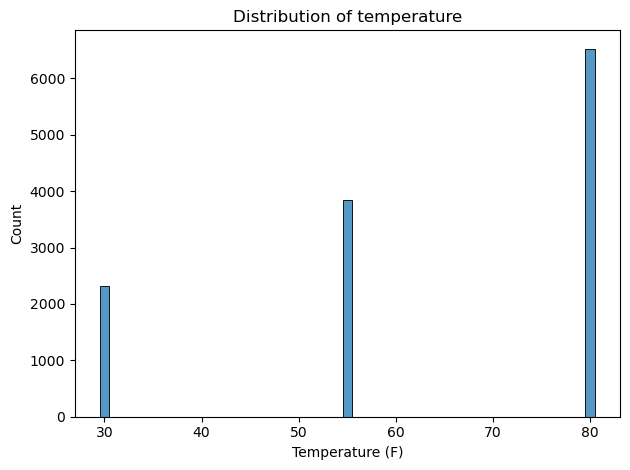

In [89]:
sns.histplot(data=data, x="temperature", bins=3, discrete=True)

plt.xlabel("Temperature (F)")
plt.title("Distribution of temperature")
plt.tight_layout()
plt.savefig("images/TemperatureHistogram.png")
plt.show()

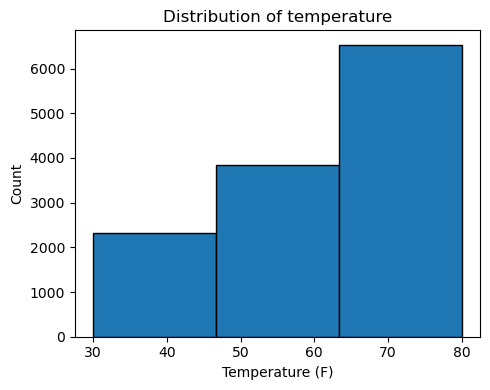

In [91]:
plt.figure(figsize=(5,4))
plt.hist(data["temperature"], bins=3, edgecolor="black")

plt.xlabel("Temperature (F)")
plt.ylabel("Count")
plt.title("Distribution of temperature")
plt.tight_layout()
plt.savefig("images/TemperatureHistogram2.png")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [98]:
bar_data = data[data["coupon"] == "Bar"]

bar_data.head()
bar_data.info()
bar_data["coupon"].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   2017 non-null   object
 15  Bar                   2017 non-null   obje

array(['Bar'], dtype=object)

2. What proportion of bar coupons were accepted?


In [99]:
bar_accept_prop = bar_data["Y"].mean()        # proportion accepted

print("Proportion of bar coupons accepted:", bar_accept_prop)

Proportion of bar coupons accepted: 0.41001487357461575


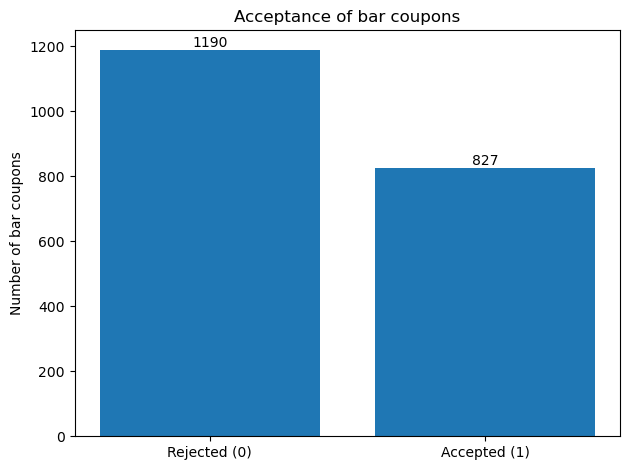

In [100]:
bar_counts = bar_data["Y"].value_counts().sort_index()  # 0 then 1

plt.bar(bar_counts.index.astype(str), bar_counts.values)
# Add labels manually
for i, v in enumerate(bar_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')
    # i is the x position, v + 0.1 is the y position (slightly above the bar)
plt.xticks([0, 1], ["Rejected (0)", "Accepted (1)"])
plt.ylabel("Number of bar coupons")
plt.title("Acceptance of bar coupons")
plt.tight_layout()
plt.savefig("images/BarCouponsAcceptance.png")
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Create a bar frequency group first

In [104]:
# Define which categories count as ≤3 times per month
low_bar_levels = ["never", "less1", "1~3"]

data["bar_3_or_less"] = data["Bar"].isin(low_bar_levels)

Next Compare the acceptance rates

In [105]:
accept_by_bar_group = data.groupby("bar_3_or_less")["Y"].mean()
print(accept_by_bar_group)

bar_3_or_less
False    0.614883
True     0.562052
Name: Y, dtype: float64


now visualise the comparison

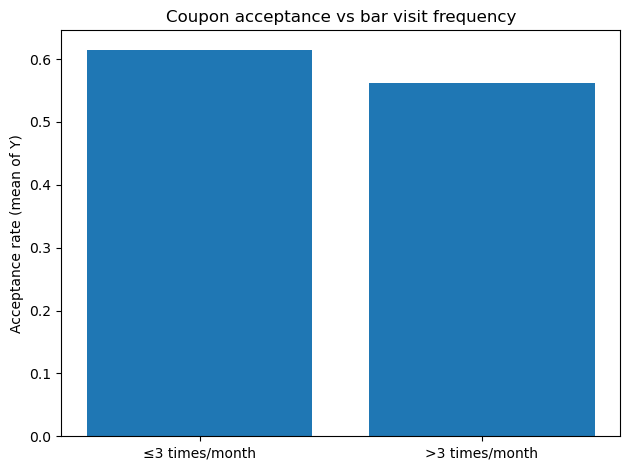

In [107]:
accept_by_bar_group.index = ["≤3 times/month", ">3 times/month"]

plt.bar(accept_by_bar_group.index, accept_by_bar_group.values)

plt.ylabel("Acceptance rate (mean of Y)")
plt.title("Coupon acceptance vs bar visit frequency")
plt.tight_layout()
plt.savefig("images/AcceptanceOnBarVisits.png")
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Create the bar frequency and age frequency groups first

In [108]:
# Bar > 1/month: treat '1~3', '4~8', 'gt8' as more than once
more_than_once_levels = ["1~3", "4~8", "gt8"]

# Age is stored as categories like 'below21', '21', '26', '31', '36', '50plus', etc.
# Mark ages strictly greater than 25
#Since first and last are strings and rest can be converted to integers 
#we exploit this to create a concise code logic to filter out the right categories
def age_over_25(value):
    if value == "below21":
        return False
    try:
        return int(value) > 25
    except ValueError:
        # '50plus' will fall into the exception category as it cant be converted to an integer
        return True

data["age_over_25"] = data["age"].apply(age_over_25)

# We Define the fitered group here
data["bar_often_and_25plus"] = data["Bar"].isin(more_than_once_levels) & data["age_over_25"]
#print(data)

Next we compare the acceptance rates

In [109]:
# Acceptance rate for both groups
accept_rates = data.groupby("bar_often_and_25plus")["Y"].mean()
print(accept_rates)

bar_often_and_25plus
False    0.553548
True     0.621534
Name: Y, dtype: float64


now we visualise the comparison

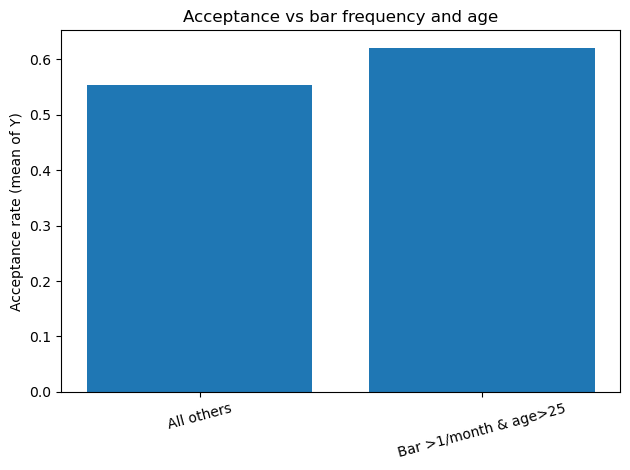

In [110]:
accept_rates.index = ["All others", "Bar >1/month & age>25"]

plt.bar(accept_rates.index, accept_rates.values)
plt.ylabel("Acceptance rate (mean of Y)")
plt.title("Acceptance vs bar frequency and age")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("images/AcceptanceOnBar>1perMonthAndAge>25.png")
plt.show()

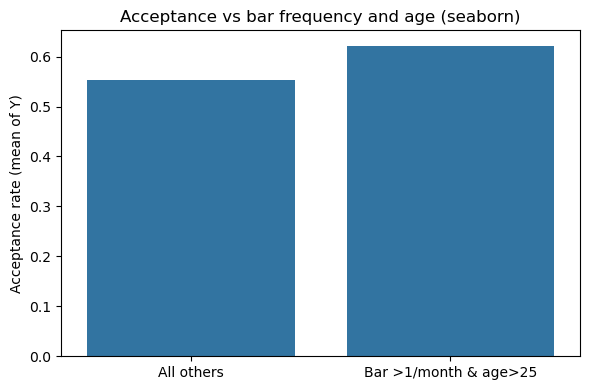

In [111]:
#same visualisation using Seaborn
# Build a summary DataFrame for plotting
summary = (
    data.groupby("bar_often_and_25plus")["Y"]
      .mean()
      .reset_index()
)

summary["group"] = summary["bar_often_and_25plus"].map({
    False: "All others",
    True: "Bar >1/month & age>25"
})

plt.figure(figsize=(6,4))
sns.barplot(data=summary, x="group", y="Y")
plt.ylabel("Acceptance rate (mean of Y)")
plt.xlabel("")
plt.title("Acceptance vs bar frequency and age (seaborn)")
plt.tight_layout()
plt.savefig("images/AcceptanceOnBar>1perMonthAndAge>25_seaborn.png")
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Create the frequency groups first by filtering from the main dataframe

In [112]:
# "More than once a month" at bars
more_than_once_levels = ["1~3", "4~8", "gt8"]

bar_often = data["Bar"].isin(more_than_once_levels)

# Passenger not a kid; note the value in the csv file is Kid(s)
no_kid_passenger = data["passanger"] != "Kid(s)"

# Occupation not farming/fishing/forestry
not_fff = data["occupation"] != "Farming Fishing & Forestry"

# Combined focal group
data["bar_often_no_kid_not_fff"] = bar_often & no_kid_passenger & not_fff

Get the accepatnce rate comparison

In [113]:
# Acceptance rate for focal group vs all others
accept_rates = data.groupby("bar_often_no_kid_not_fff")["Y"].mean()
print(accept_rates)

bar_often_no_kid_not_fff
False    0.545950
True     0.623106
Name: Y, dtype: float64


Get the visualisation

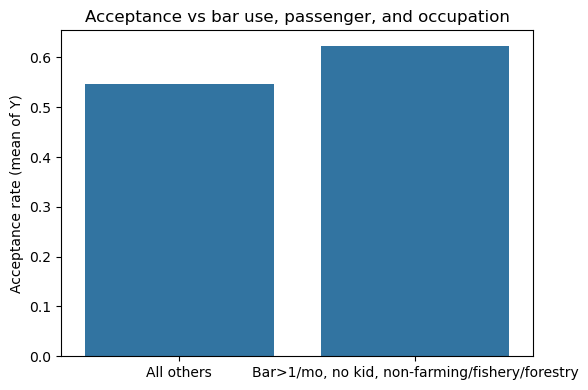

In [114]:
summary = (
    data.groupby("bar_often_no_kid_not_fff")["Y"]
      .mean()
      .reset_index()
)

summary["group"] = summary["bar_often_no_kid_not_fff"].map({
    False: "All others",
    True: "Bar>1/mo, no kid, non-farming/fishery/forestry"
})

plt.figure(figsize=(6,4))
sns.barplot(data=summary, x="group", y="Y")
plt.ylabel("Acceptance rate (mean of Y)")
plt.xlabel("")
plt.title("Acceptance vs bar use, passenger, and occupation")
plt.tight_layout()
plt.savefig("images/AcceptanceOnBar>1perMonth_noKid_noFFF_seaborn.png")
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Creating the filtered groups

In [115]:
#  bar more than once a month
bar_more_levels = ["1~3", "4~8", "gt8"]
bar_more = data["Bar"].isin(bar_more_levels)

#  age under 30
def age_under_30(a):
    if a == "below21":
        return True
    try:
        return int(a) < 30
    except ValueError:
        # '50plus' and similar
        return False

age_lt_30 = data["age"].apply(age_under_30)

# income < 50K
low_income_levels = [
    "Less than $12500",
    "$12500 - $24999",
    "$25000 - $37499",
    "$37500 - $49999"
]

income_lt_50k = data["income"].isin(low_income_levels)

#  cheap restaurants > 4 times/month (4~8 or gt8)
cheap_rest_often = data["RestaurantLessThan20"].isin(["4~8", "gt8"])

# Group 1: bar>1/mo, no kid passenger, not widowed
group1 = (
    bar_more &
    (data["passanger"] != "Kid(s)") &
    (data["maritalStatus"] != "Widowed")
)

# Group 2: bar>1/mo and age < 30
group2 = bar_more & age_lt_30

# Group 3: cheap restaurants >4/mo and income < 50K
group3 = cheap_rest_often & income_lt_50k

# Rows can fall in multiple logical sets; group encodes which combination they satisfy (1, 2, 3, or 0 for none)
data["group"] = (
    group1.astype(int) * 1 +
    group2.astype(int) * 2 +
    group3.astype(int) * 3
)

Determining the acceptance rates

In [118]:
# Filter to rows that are in at least one of the three groups
mask_any = group1 | group2 | group3
subset = data[mask_any].copy()

# For clarity, relabel for plotting
def label_group(row):
    labels = []
    if group1.loc[row.name]:
        labels.append("1) Bar>1/mo, no kid, not widowed")
    if group2.loc[row.name]:
        labels.append("2) Bar>1/mo & age<30")
    if group3.loc[row.name]:
        labels.append("3) CheapRest>4/mo & income<50K")
    return " & ".join(labels)

subset["group_label"] = subset.apply(label_group, axis=1)
#The printed means are the acceptance rates for each of the three definitions; 
#comparing them answers whether one of these behavioural/ demographic profiles accepts coupons more often.
accept_by_group = subset.groupby("group_label")["Y"].mean()
print(accept_by_group)

group_label
1) Bar>1/mo, no kid, not widowed                                                            0.611470
1) Bar>1/mo, no kid, not widowed & 2) Bar>1/mo & age<30                                     0.605214
1) Bar>1/mo, no kid, not widowed & 2) Bar>1/mo & age<30 & 3) CheapRest>4/mo & income<50K    0.681159
1) Bar>1/mo, no kid, not widowed & 3) CheapRest>4/mo & income<50K                           0.654867
2) Bar>1/mo & age<30                                                                        0.750000
2) Bar>1/mo & age<30 & 3) CheapRest>4/mo & income<50K                                       0.687500
3) CheapRest>4/mo & income<50K                                                              0.555791
Name: Y, dtype: float64


Seaborn based visualisation of above

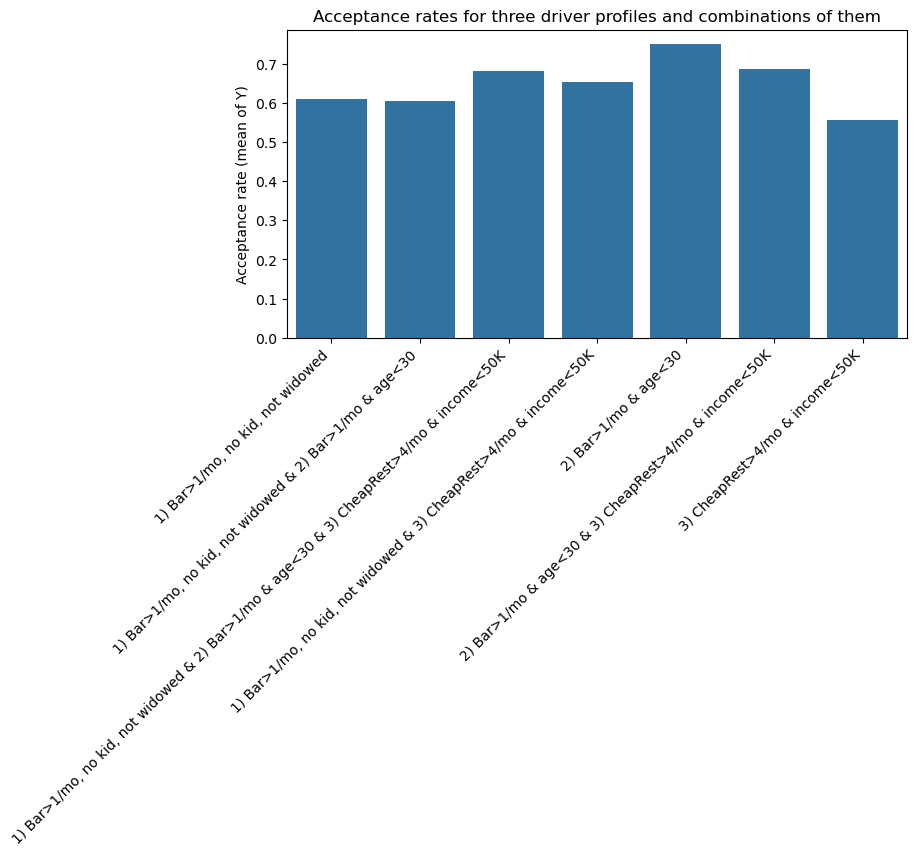

In [124]:
#This bar chart shows the acceptance rate for each of the three specified driver groups side by side.
summary = (
    subset.groupby("group_label")["Y"]
          .mean()
          .reset_index()
)

plt.figure(figsize=(8,4))
sns.barplot(data=summary, x="group_label", y="Y")
plt.ylabel("Acceptance rate (mean of Y)")
plt.xlabel("")
plt.title("Acceptance rates for three driver profiles and combinations of them")
plt.xticks(rotation=45, ha="right")
plt.savefig("images/DriverAcceptanceRatesaAcrossCombinations.png",bbox_inches='tight')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Hypothesis

**_In general, drivers who accept bar coupons seem to be more socially active bar-goers(>1 per month) in relatively unconstrained conditions (no kids) and younger_**

**Bar going frequency and age:**
Based on the results, acceptance is higher among drivers who report going tobars more often than among those who rarely never go. When we further restrict to "bar more than once a month and age under 30", the acceptance rate increases relative to all other drivers, suggesting younger, frequent bar goers are more responsive to bar coupons.

**Passengers and family context:**
When comparing bar coupon acceptance with different passengers, scenarios with friends or partner tend to show higher acceptance than those with kids. The segment “bar more than once a month, no kid passengers, and not widowed” showed higher acceptance than the complement group, reinforcing that adult social contexts (and non-bereaved marital status) align with a greater likelihood of using a bar coupon

**Broader behavioural and economic pattern:**
Profiles combining high bar or cheap-restaurant frequency with lower-to-moderate income (for example, cheap restaurants more than 4 times per month and income below 50K) also displayed relatively higher coupon acceptance, indicating that cost-conscious but socially active drivers are more inclined to redeem offers. Taken together, a reasonable hypothesis is that a driver who already frequents bars, is younger, out with other adults (no kids), and not in a constrained or atypical life situation is substantially more likely to accept a bar coupon than the average driver.

# Actionable Items

# Recommendations

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  